[[Variables]]
    area1:  0.77583327 (init = 0.5)
    cen1:  -0.24483414 (init = 0.2)
    fwhm1:  0.76347649 (init = 0.5)
    area2:  0.00174285 (init = 0.09)
    cen2:   2.72266329 (init = 2.7)
    fwhm2:  0.88996990 (init = 2.5)
    area3:  0.00100000 (init = 0.09)
    cen3:   8.05962275 (init = 10)
    fwhm3:  0.89127483 (init = 2.5)
    area4:  0.00615274 (init = 0.05)
    cen4:   14.7311057 (init = 14.2)
    fwhm4:  2.91106466 (init = 1)
    area5:  0.00235125 (init = 0.05)
    cen5:   9.00992891 (init = 9)
    fwhm5:  1.28116900 (init = 2.2)
    area6:  0.10262113 (init = 0.09)
    cen6:   2.00000001 (init = 2.7)
    fwhm6:  7.50000000 (init = 2.5)
    a:      0.017 (fixed)
    b:      0.85 (fixed)
    c:      10 (fixed)
[[Variables]]
    area1:  0.52234749 +/- 0.00306425 (0.59%) (init = 0.5)
    cen1:   0.15118186 +/- 0.00117265 (0.78%) (init = 0.2)
    fwhm1:  0.77038869 +/- 0.00310190 (0.40%) (init = 0.5)
    area2:  0.00178877 +/- 290.299160 (16228978.55%) (init = 0.09)
    c

C:\Users\test\AppData\Local\Temp\ipykernel_2876\3358860588.py:247: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, fit_curve, 'r-', label="HoIO Fit", color="yellow")


[[Variables]]
    area1:  0.77195163 (init = 0.6)
    cen1:  -0.24858824 (init = 0.2)
    fwhm1:  0.74755372 (init = 0.5)
    area2:  0.00508620 (init = 0.009)
    cen2:   2.8 (fixed)
    fwhm2:  3 (fixed)
    area3:  0.00145702 (init = 0.09)
    cen3:   16.9843753 (init = 15)
    fwhm3:  1.73717943 (init = 2.5)
    area4:  0.01567757 (init = 0.05)
    cen4:   19.6527341 (init = 20)
    fwhm4:  3.51112623 (init = 1)
    area5:  0.00740583 (init = 0.05)
    cen5:   6.00000000 (init = 7)
    fwhm5:  2.16108826 (init = 2.2)
    area6:  0.06729203 (init = 0.09)
    cen6:   2.57794112 (init = 2.3)
    fwhm6:  4.31307706 (init = 2.5)
    area7:  1.0000e-04 (init = 0.09)
    cen7:   2.40000000 (init = 2.2)
    fwhm7:  4.36826457 (init = 2.5)
    a:      0.035 (fixed)
    b:      0.5 (fixed)
    c:      10.5 (fixed)


C:\Users\test\AppData\Local\Temp\ipykernel_2876\3358860588.py:387: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, fit_curve, 'r-', label="YIO Fit", color="black")


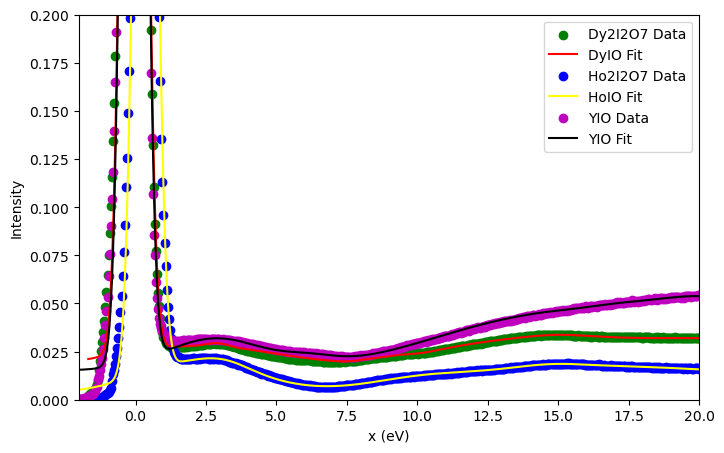

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Parameters, Minimizer, report_fit

# Define Gaussian function
def gaussian(x, area, center, fwhm):
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))
    return (area / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - center) ** 2) / (2 * sigma ** 2))

# Define sigmoid background
def sigmoid(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))+0.015

# Apply 0.2 eV shift to the entire fit
SHIFT_E = 0.2

# Model with 5 Gaussians + Sigmoid background
def initial_gaussian(x, area1, cen1, fwhm1, 
                     area2, cen2, fwhm2, 
                     area3, cen3, fwhm3, 
                     area4, cen4, fwhm4,
                     area5, cen5, fwhm5,
                     area6, cen6, fwhm6,
                     a, b, c):
    x_shifted = x - SHIFT_E  # Apply the shift to x before passing it into functions
    return (gaussian(x_shifted, area1, cen1, fwhm1) +
            gaussian(x_shifted, area2, cen2, fwhm2) +
            gaussian(x_shifted, area3, cen3, fwhm3) +
            gaussian(x_shifted, area4, cen4, fwhm4) +
            gaussian(x_shifted, area5, cen5, fwhm5) +
            gaussian(x_shifted, area6, cen6, fwhm6) +
            sigmoid(x_shifted, a, b, c))

# Define residuals function for fitting
def residuals(params, x, y):
    model = initial_gaussian(x, 
                             params['area1'], params['cen1'], params['fwhm1'], 
                             params['area2'], params['cen2'], params['fwhm2'], 
                             params['area3'], params['cen3'], params['fwhm3'], 
                             params['area4'], params['cen4'], params['fwhm4'],  
                             params['area5'], params['cen5'], params['fwhm5'],
                             params['area6'], params['cen6'], params['fwhm6'],
                             params['a'], params['b'], params['c'])
    return model - y

# Peak fitting function
def fit_peak(x1, y1, plot_fit=True, max_nfev=200000):
    params = Parameters()
    
    # Main peak
    params.add('area1', value=0.5, min=0.0001, max=5, vary=True)
    params.add('cen1', value=0.2, min=-1.8, max=2.2, vary=True)  
    params.add('fwhm1', value=0.5, min=0.1, max=2, vary=True)  
    
    # Secondary peaks
    params.add('area2', value=0.09, min=0.0001, max=10, vary=True)
    params.add('cen2', value=2.7, min=2, max=5.2, vary=True)
    params.add('fwhm2', value=2.5, min=0.1, max=6, vary=True)
    
    params.add('area3', value=0.09, min=0.001, max=10, vary=True)
    params.add('cen3', value=10, min=8, max=11, vary=True)
    params.add('fwhm3', value=2.5, min=0.1, max=10, vary=True)
    
    
    params.add('area4', value=0.05, min=0.00001, max=5, vary=True)
    params.add('cen4', value=14.2, min=12.2, max=18.2, vary=True)
    params.add('fwhm4', value=1, min=0.1, max=6, vary=True)

    params.add('area5', value=0.05, min=0.00001, max=1, vary=True)
    params.add('cen5', value=9, min=9, max=11, vary=True)
    params.add('fwhm5', value=2.2, min=.01, max=6, vary=True)
    
    params.add('area6', value=0.09, min=0.0001, max=10, vary=True)
    params.add('cen6', value=2.7, min=2, max=5.2, vary=True)
    params.add('fwhm6', value=2.5, min=0.1, max=7.5, vary=True)

    # Sigmoid background
    params.add('a', value=0.017, min=0.01, max=0.5, vary=False)  
    params.add('b', value=0.85, min=0.1, max=10, vary=False)  
    params.add('c', value=10, min=4, max=14, vary=False) 
    
    # Perform minimization
    minner = Minimizer(residuals, params, fcn_args=(x1, y1))
    result = minner.minimize(max_nfev=max_nfev)

    # Compute the best fit with the shift applied
    fit_curve = initial_gaussian(x1, 
                                 result.params['area1'], result.params['cen1'], result.params['fwhm1'], 
                                 result.params['area2'], result.params['cen2'], result.params['fwhm2'], 
                                 result.params['area3'], result.params['cen3'], result.params['fwhm3'], 
                                 result.params['area4'], result.params['cen4'], result.params['fwhm4'],  
                                 result.params['area5'], result.params['cen5'], result.params['fwhm5'],  
                                 result.params['area6'], result.params['cen6'], result.params['fwhm6'], 
                                 result.params['a'], result.params['b'], result.params['c'])  
    
    report_fit(result.params)
    
    # Plotting
    if plot_fit:
        plt.figure(figsize=(8, 5))
        shift = 100  # Amount to shift each dataset
        plt.scatter(x1, y1, c='g', label="Dy2I2O7 Data")
        plt.plot(x1, fit_curve, 'r-', label="DyIO Fit")
        #plt.plot(x1, sigmoid(x1, result.params['a'], result.params['b'], result.params['c']))
        plt.xlim(-2, 20)
        plt.ylim(0, .2)
        plt.xlabel("x (eV)")
        plt.ylabel("Intensity")
        plt.legend()
        #plt.show()
    
    return fit_curve

# Load data
file_path = "Good_DyIO_200eV.csv"
df = pd.read_csv(file_path, skiprows=24, sep=r"\s+", names=["Var1", "Var2"])

x = df["Var1"].values
y = df["Var2"].values

# Shift and normalize the data
x_shifted = -((x - 204318) / 1000)
y_normalized = y / 5418740

# Define the cutoff range
mask = x_shifted <= 20
x_cut = x_shifted[mask]
y_cut = y_normalized[mask]

# Run the fitting function
fit_curve = fit_peak(x_cut, y_cut)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Parameters, Minimizer, report_fit

# Define Gaussian function
def gaussian(x, area, center, fwhm):
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))
    return (area / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - center) ** 2) / (2 * sigma ** 2))

# Define sigmoid background
def sigmoid(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))+0.003

# Apply 0.2 eV shift to the entire fit
SHIFT_E = 0.2

# Model with 5 Gaussians + Sigmoid background
def initial_gaussian(x, area1, cen1, fwhm1, 
                     area2, cen2, fwhm2, 
                     area3, cen3, fwhm3, 
                     area4, cen4, fwhm4,
                     area5, cen5, fwhm5,
                     area6, cen6, fwhm6,
                     area7, cen7, fwhm7,
                     a, b, c):
    x_shifted = x - SHIFT_E  # Apply the shift to x before passing it into functions
    return (gaussian(x_shifted, area1, cen1, fwhm1) +
            gaussian(x_shifted, area2, cen2, fwhm2) +
            gaussian(x_shifted, area3, cen3, fwhm3) +
            gaussian(x_shifted, area4, cen4, fwhm4) +
            gaussian(x_shifted, area5, cen5, fwhm5) +
            gaussian(x_shifted, area6, cen6, fwhm6) +
            gaussian(x_shifted, area7, cen7, fwhm7) +
            sigmoid(x_shifted, a, b, c))

# Define residuals function for fitting
def residuals(params, x, y):
    model = initial_gaussian(x, 
                             params['area1'], params['cen1'], params['fwhm1'], 
                             params['area2'], params['cen2'], params['fwhm2'], 
                             params['area3'], params['cen3'], params['fwhm3'], 
                             params['area4'], params['cen4'], params['fwhm4'],  
                             params['area5'], params['cen5'], params['fwhm5'],
                             params['area6'], params['cen6'], params['fwhm6'],
                             params['area7'], params['cen7'], params['fwhm7'],
                             params['a'], params['b'], params['c'])
    return model - y

# Peak fitting function
def fit_peak(x1, y1, plot_fit=True, max_nfev=200000):
    params = Parameters()
    
    # Main peak
    params.add('area1', value=0.5, min=0.0001, max=5, vary=True)
    params.add('cen1', value=0.2, min=-1.8, max=2.2, vary=True)  
    params.add('fwhm1', value=0.5, min=0.1, max=2, vary=True)  
    
    # Secondary peaks
    params.add('area2', value=0.09, min=0.0001, max=10, vary=True)
    params.add('cen2', value=3, min=2, max=5.2, vary=False)
    params.add('fwhm2', value=2.5, min=0.1, max=6, vary=True)
    
    params.add('area3', value=0.09, min=0.001, max=10, vary=True)
    params.add('cen3', value=3, min=2, max=5, vary=False)
    params.add('fwhm3', value=2.5, min=0.1, max=10, vary=True)
    
    
    params.add('area4', value=0.05, min=0.00001, max=5, vary=True)
    params.add('cen4', value=14.2, min=12.2, max=18.2, vary=True)
    params.add('fwhm4', value=1, min=0.1, max=6, vary=True)

    params.add('area5', value=0.05, min=0.00001, max=1, vary=True)
    params.add('cen5', value=9, min=9, max=11, vary=True)
    params.add('fwhm5', value=2.2, min=.01, max=6, vary=True)
    
    params.add('area6', value=0.09, min=0.0001, max=10, vary=True)
    params.add('cen6', value=4, min=2, max=5.2, vary=True)
    params.add('fwhm6', value=2.5, min=0.1, max=7.5, vary=True)
    
    params.add('area7', value=0.09, min=0.0001, max=10, vary=True)
    params.add('cen7', value=15, min=10, max=17, vary=True)
    params.add('fwhm7', value=2.5, min=0.1, max=7.5, vary=True)


    # Sigmoid background
    params.add('a', value=0.008, min=0.01, max=0.5, vary=False)  
    params.add('b', value=0.9, min=0.1, max=10, vary=False)  
    params.add('c', value=8.7, min=4, max=14, vary=False) 
    
    # Perform minimization
    minner = Minimizer(residuals, params, fcn_args=(x1, y1))
    result = minner.minimize(max_nfev=max_nfev)

    # Compute the best fit with the shift applied
    # Compute the best fit with the shift applied
    fit_curve = initial_gaussian(x1, 
                             result.params['area1'], result.params['cen1'], result.params['fwhm1'], 
                             result.params['area2'], result.params['cen2'], result.params['fwhm2'], 
                             result.params['area3'], result.params['cen3'], result.params['fwhm3'], 
                             result.params['area4'], result.params['cen4'], result.params['fwhm4'],  
                             result.params['area5'], result.params['cen5'], result.params['fwhm5'],  
                             result.params['area6'], result.params['cen6'], result.params['fwhm6'],
                             result.params['area7'], result.params['cen7'], result.params['fwhm7'],  # <-- Add missing Gaussian!
                             result.params['a'], result.params['b'], result.params['c'])  

    report_fit(result.params)
    
    # Plotting
    if plot_fit:
        #plt.figure(figsize=(8, 5))
        plt.scatter(x1, y1, c='b', label="Ho2I2O7 Data")
        plt.plot(x1, fit_curve, 'r-', label="HoIO Fit", color="yellow")
        #plt.plot(x1, sigmoid(x1, result.params['a'], result.params['b'], result.params['c']))
        plt.xlim(-2, 20)
        plt.ylim(0, .2)
        plt.xlabel("x (eV)")
        plt.ylabel("Intensity")
        plt.legend()
        #plt.show()
    
    return fit_curve

# Load data
file_path = "HIO_200eV_norm.csv"
df = pd.read_csv(file_path, skiprows=24, sep=r"\s+", names=["Var1", "Var2"])

x = df["Var1"].values
y = df["Var2"].values

# Shift and normalize the data
x_shifted = -((x - 204127) / 1000)
y_normalized = (y / 996797) 

# Define the cutoff range
mask = x_shifted <= 20
x_cut = x_shifted[mask]
y_cut = y_normalized[mask] 

# Run the fitting function
fit_curve = fit_peak(x_cut, y_cut)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Parameters, Minimizer, report_fit

# Define Gaussian function
def gaussian(x, area, center, fwhm):
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))
    return (area / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - center) ** 2) / (2 * sigma ** 2))

# Define sigmoid background
def sigmoid(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))+0.015

# Apply 0.2 eV shift to the entire fit
SHIFT_E = 0.2

# Model with 5 Gaussians + Sigmoid background
def initial_gaussian(x, area1, cen1, fwhm1, 
                     area2, cen2, fwhm2, 
                     area3, cen3, fwhm3, 
                     area4, cen4, fwhm4,
                     area5, cen5, fwhm5,
                     area6, cen6, fwhm6,
                     area7, cen7, fwhm7,
                     a, b, c):
    x_shifted = x - SHIFT_E  # Apply the shift to x before passing it into functions
    return (gaussian(x_shifted, area1, cen1, fwhm1) +
            gaussian(x_shifted, area2, cen2, fwhm2) +
            gaussian(x_shifted, area3, cen3, fwhm3) +
            gaussian(x_shifted, area4, cen4, fwhm4) +
            gaussian(x_shifted, area5, cen5, fwhm5) +
            gaussian(x_shifted, area6, cen6, fwhm6) +
            gaussian(x_shifted, area7, cen7, fwhm7) +
            sigmoid(x_shifted, a, b, c))

# Define residuals function for fitting
def residuals(params, x, y):
    model = initial_gaussian(x, 
                             params['area1'], params['cen1'], params['fwhm1'], 
                             params['area2'], params['cen2'], params['fwhm2'], 
                             params['area3'], params['cen3'], params['fwhm3'], 
                             params['area4'], params['cen4'], params['fwhm4'],  
                             params['area5'], params['cen5'], params['fwhm5'],
                             params['area6'], params['cen6'], params['fwhm6'],
                             params['area7'], params['cen7'], params['fwhm7'],
                             params['a'], params['b'], params['c'])
    return model - y

# Peak fitting function
def fit_peak(x1, y1, plot_fit=True, max_nfev=200000):
    params = Parameters()
    
    # Main peak
    params.add('area1', value=0.6, min=0.0001, max=5, vary=True)
    params.add('cen1', value=0.2, min=-1.8, max=2.2, vary=True)  
    params.add('fwhm1', value=0.5, min=0.1, max=2, vary=True)  
    
    # Secondary peaks
    params.add('area2', value=0.009, min=0.0001, max=2, vary=True)
    params.add('cen2', value=2.8, min=2, max=5.2, vary=False)
    params.add('fwhm2', value=3, min=0.1, max=6, vary=False)
    
    params.add('area3', value=0.09, min=0.001, max=10, vary=True)
    params.add('cen3', value=15, min=13, max=17, vary=True)
    params.add('fwhm3', value=2.5, min=0.1, max=10, vary=True)
    
    
    params.add('area4', value=0.05, min=0.00001, max=5, vary=True)
    params.add('cen4', value=20, min=19, max=20.5, vary=True)
    params.add('fwhm4', value=1, min=0.1, max=6, vary=True)

    params.add('area5', value=0.05, min=0.00001, max=1, vary=True)
    params.add('cen5', value=7, min=6, max=8, vary=True)
    params.add('fwhm5', value=2.2, min=.01, max=6, vary=True)
    
    params.add('area6', value=0.09, min=0.0001, max=10, vary=True)
    params.add('cen6', value=2.3, min=2, max=5.2, vary=True)
    params.add('fwhm6', value=2.5, min=0.1, max=7.5, vary=True)
    
    params.add('area7', value=0.09, min=0.0001, max=10, vary=True)
    params.add('cen7', value=2.2, min=1.9, max=2.4, vary=True)
    params.add('fwhm7', value=2.5, min=0.1, max=7.5, vary=True)


    # Sigmoid background
    params.add('a', value=0.035, min=0.01, max=0.5, vary=False)  
    params.add('b', value=0.5, min=0.1, max=10, vary=False)  
    params.add('c', value=10.5, min=4, max=14, vary=False) 
    
    # Perform minimization
    minner = Minimizer(residuals, params, fcn_args=(x1, y1))
    result = minner.minimize(max_nfev=max_nfev)

    # Compute the best fit with the shift applied
    fit_curve = initial_gaussian(x1, 
                                 result.params['area1'], result.params['cen1'], result.params['fwhm1'], 
                                 result.params['area2'], result.params['cen2'], result.params['fwhm2'], 
                                 result.params['area3'], result.params['cen3'], result.params['fwhm3'], 
                                 result.params['area4'], result.params['cen4'], result.params['fwhm4'],  
                                 result.params['area5'], result.params['cen5'], result.params['fwhm5'],  
                                 result.params['area6'], result.params['cen6'], result.params['fwhm6'], 
                                 result.params['area7'], result.params['cen7'], result.params['fwhm7'],
                                 result.params['a'], result.params['b'], result.params['c'])  
    
    report_fit(result.params)
    
    # Plotting
    if plot_fit:
        #plt.figure(figsize=(8, 5))
        plt.scatter(x1, y1, c='m', label="YIO Data")
        plt.plot(x1, fit_curve, 'r-', label="YIO Fit", color="black")
        #plt.plot(x1, sigmoid(x1, result.params['a'], result.params['b'], result.params['c']))
        plt.xlim(-2, 20)
        plt.ylim(0, .2)
        plt.xlabel("x (eV)")
        plt.ylabel("Intensity")
        plt.legend()
        plt.savefig("EELS_Fit.png", dpi=300, bbox_inches='tight')
        plt.show()
    
    return fit_curve

# Load data
file_path = "140_normal_YIO.csv"
df = pd.read_csv(file_path, skiprows=24, sep=r"\s+", names=["Var1", "Var2"])

x = df["Var1"].values
y = df["Var2"].values

# Shift and normalize the data
x_shifted = -((x - 133783) / 1000)
y_normalized = (y / 1171220)

# Define the cutoff range
mask = x_shifted <= 20
x_cut = x_shifted[mask]
y_cut = y_normalized[mask]

# Run the fitting function
fit_curve = fit_peak(x_cut, y_cut)



[[Variables]]
    area1:  0.77583327 (init = 0.5)
    cen1:  -0.24483414 (init = 0.2)
    fwhm1:  0.76347649 (init = 0.5)
    area2:  0.00174285 (init = 0.09)
    cen2:   2.72266329 (init = 2.7)
    fwhm2:  0.88996990 (init = 2.5)
    area3:  0.00100000 (init = 0.09)
    cen3:   8.05962275 (init = 10)
    fwhm3:  0.89127483 (init = 2.5)
    area4:  0.00615274 (init = 0.05)
    cen4:   14.7311057 (init = 14.2)
    fwhm4:  2.91106466 (init = 1)
    area5:  0.00235125 (init = 0.05)
    cen5:   9.00992891 (init = 9)
    fwhm5:  1.28116900 (init = 2.2)
    area6:  0.10262113 (init = 0.09)
    cen6:   2.00000001 (init = 2.7)
    fwhm6:  7.50000000 (init = 2.5)
    a:      0.017 (fixed)
    b:      0.85 (fixed)
    c:      10 (fixed)


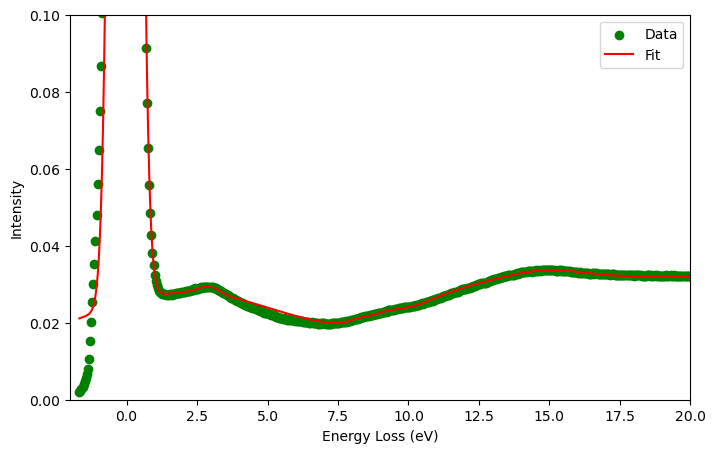

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Parameters, Minimizer, report_fit

# Define Gaussian function
def gaussian(x, area, center, fwhm):
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))
    return (area / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - center) ** 2) / (2 * sigma ** 2))

# Define sigmoid background
def sigmoid(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))+0.015

# Apply 0.2 eV shift to the entire fit
SHIFT_E = 0.2

# Model with 5 Gaussians + Sigmoid background
def initial_gaussian(x, area1, cen1, fwhm1, 
                     area2, cen2, fwhm2, 
                     area3, cen3, fwhm3, 
                     area4, cen4, fwhm4,
                     area5, cen5, fwhm5,
                     area6, cen6, fwhm6,
                     a, b, c):
    x_shifted = x - SHIFT_E  # Apply the shift to x before passing it into functions
    return (gaussian(x_shifted, area1, cen1, fwhm1) +
            gaussian(x_shifted, area2, cen2, fwhm2) +
            gaussian(x_shifted, area3, cen3, fwhm3) +
            gaussian(x_shifted, area4, cen4, fwhm4) +
            gaussian(x_shifted, area5, cen5, fwhm5) +
            gaussian(x_shifted, area6, cen6, fwhm6) +
            sigmoid(x_shifted, a, b, c))

# Define residuals function for fitting
def residuals(params, x, y):
    model = initial_gaussian(x, 
                             params['area1'], params['cen1'], params['fwhm1'], 
                             params['area2'], params['cen2'], params['fwhm2'], 
                             params['area3'], params['cen3'], params['fwhm3'], 
                             params['area4'], params['cen4'], params['fwhm4'],  
                             params['area5'], params['cen5'], params['fwhm5'],
                             params['area6'], params['cen6'], params['fwhm6'],
                             params['a'], params['b'], params['c'])
    return model - y

# Peak fitting function
def fit_peak(x1, y1, plot_fit=True, max_nfev=200000):
    params = Parameters()
    
    # Main peak
    params.add('area1', value=0.5, min=0.0001, max=5, vary=True)
    params.add('cen1', value=0.2, min=-1.8, max=2.2, vary=True)  
    params.add('fwhm1', value=0.5, min=0.1, max=2, vary=True)  
    
    # Secondary peaks
    params.add('area2', value=0.09, min=0.0001, max=10, vary=True)
    params.add('cen2', value=2.7, min=2, max=5.2, vary=True)
    params.add('fwhm2', value=2.5, min=0.1, max=6, vary=True)
    
    params.add('area3', value=0.09, min=0.001, max=10, vary=True)
    params.add('cen3', value=10, min=8, max=11, vary=True)
    params.add('fwhm3', value=2.5, min=0.1, max=10, vary=True)
    
    
    params.add('area4', value=0.05, min=0.00001, max=5, vary=True)
    params.add('cen4', value=14.2, min=12.2, max=18.2, vary=True)
    params.add('fwhm4', value=1, min=0.1, max=6, vary=True)

    params.add('area5', value=0.05, min=0.00001, max=1, vary=True)
    params.add('cen5', value=9, min=9, max=11, vary=True)
    params.add('fwhm5', value=2.2, min=.01, max=6, vary=True)
    
    params.add('area6', value=0.09, min=0.0001, max=10, vary=True)
    params.add('cen6', value=2.7, min=2, max=5.2, vary=True)
    params.add('fwhm6', value=2.5, min=0.1, max=7.5, vary=True)

    # Sigmoid background
    params.add('a', value=0.017, min=0.01, max=0.5, vary=False)  
    params.add('b', value=0.85, min=0.1, max=10, vary=False)  
    params.add('c', value=10, min=4, max=14, vary=False) 
    
    # Perform minimization
    minner = Minimizer(residuals, params, fcn_args=(x1, y1))
    result = minner.minimize(max_nfev=max_nfev)

    # Compute the best fit with the shift applied
    fit_curve = initial_gaussian(x1, 
                                 result.params['area1'], result.params['cen1'], result.params['fwhm1'], 
                                 result.params['area2'], result.params['cen2'], result.params['fwhm2'], 
                                 result.params['area3'], result.params['cen3'], result.params['fwhm3'], 
                                 result.params['area4'], result.params['cen4'], result.params['fwhm4'],  
                                 result.params['area5'], result.params['cen5'], result.params['fwhm5'],  
                                 result.params['area6'], result.params['cen6'], result.params['fwhm6'], 
                                 result.params['a'], result.params['b'], result.params['c'])  
    
    report_fit(result.params)
    
    # Plotting
    if plot_fit:
        plt.figure(figsize=(8, 5))
        plt.scatter(x1, y1, c='g', label="Data")
        plt.plot(x1, fit_curve, 'r-', label="Fit")
        #plt.plot(x1, sigmoid(x1, result.params['a'], result.params['b'], result.params['c']))
        plt.xlim(-2, 20)
        plt.ylim(0, .1)
        plt.xlabel("Energy Loss (eV)")
        plt.ylabel("Intensity")
        plt.legend()
        plt.savefig("Dy_EELS_Fit.png", dpi=300, bbox_inches='tight')
        plt.show()
    
    return fit_curve

# Load data
file_path = "Good_DyIO_200eV.csv"
df = pd.read_csv(file_path, skiprows=24, sep=r"\s+", names=["Var1", "Var2"])

x = df["Var1"].values
y = df["Var2"].values

# Shift and normalize the data
x_shifted = -((x - 204318) / 1000)
y_normalized = y / 5418740

# Define the cutoff range
mask = x_shifted <= 20
x_cut = x_shifted[mask]
y_cut = y_normalized[mask]

# Run the fitting function
fit_curve = fit_peak(x_cut, y_cut)


[[Variables]]
    area1:  0.52234749 +/- 0.00306425 (0.59%) (init = 0.5)
    cen1:   0.15118186 +/- 0.00117265 (0.78%) (init = 0.2)
    fwhm1:  0.77038869 +/- 0.00310190 (0.40%) (init = 0.5)
    area2:  0.00178877 +/- 290.299160 (16228978.55%) (init = 0.09)
    cen2:   3 (fixed)
    fwhm2:  1.94601461 +/- 194735.419 (10006883.71%) (init = 2.5)
    area3:  0.00331088 +/- 290.397281 (8770992.94%) (init = 0.09)
    cen3:   3 (fixed)
    fwhm3:  1.85622750 +/- 109262.697 (5886277.26%) (init = 2.5)
    area4:  0.00702641 +/- 0.07782837 (1107.66%) (init = 0.05)
    cen4:   14.4887780 +/- 1.08436693 (7.48%) (init = 14.2)
    fwhm4:  2.93308565 +/- 8.61926336 (293.86%) (init = 1)
    area5:  0.01261853 +/- 0.13908038 (1102.19%) (init = 0.05)
    cen5:   9.00003084 +/- 16.2912406 (181.01%) (init = 9)
    fwhm5:  5.86506688 +/- 40.7599388 (694.96%) (init = 2.2)
    area6:  0.08725388 +/- 0.09698230 (111.15%) (init = 0.09)
    cen6:   2.00002578 +/- 1.71181623 (85.59%) (init = 4)
    fwhm6:  4.87

C:\Users\test\AppData\Local\Temp\ipykernel_2876\1832752919.py:113: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, fit_curve, 'r-', label="Fit", color="yellow")


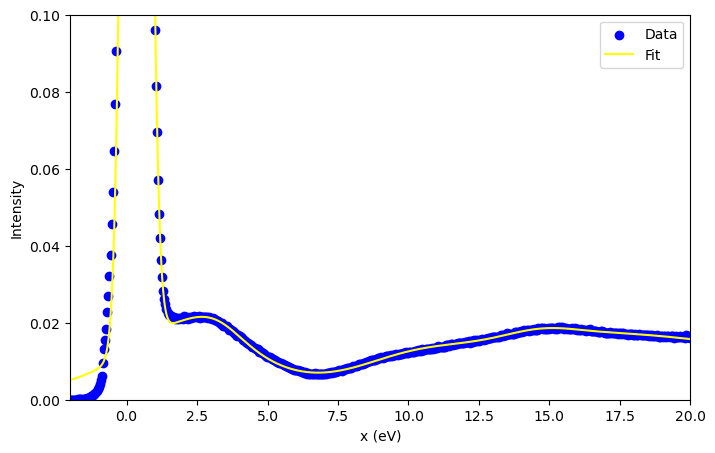

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Parameters, Minimizer, report_fit

# Define Gaussian function
def gaussian(x, area, center, fwhm):
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))
    return (area / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - center) ** 2) / (2 * sigma ** 2))

# Define sigmoid background
def sigmoid(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))+0.003

# Apply 0.2 eV shift to the entire fit
SHIFT_E = 0.2

# Model with 5 Gaussians + Sigmoid background
def initial_gaussian(x, area1, cen1, fwhm1, 
                     area2, cen2, fwhm2, 
                     area3, cen3, fwhm3, 
                     area4, cen4, fwhm4,
                     area5, cen5, fwhm5,
                     area6, cen6, fwhm6,
                     area7, cen7, fwhm7,
                     a, b, c):
    x_shifted = x - SHIFT_E  # Apply the shift to x before passing it into functions
    return (gaussian(x_shifted, area1, cen1, fwhm1) +
            gaussian(x_shifted, area2, cen2, fwhm2) +
            gaussian(x_shifted, area3, cen3, fwhm3) +
            gaussian(x_shifted, area4, cen4, fwhm4) +
            gaussian(x_shifted, area5, cen5, fwhm5) +
            gaussian(x_shifted, area6, cen6, fwhm6) +
            gaussian(x_shifted, area7, cen7, fwhm7) +
            sigmoid(x_shifted, a, b, c))

# Define residuals function for fitting
def residuals(params, x, y):
    model = initial_gaussian(x, 
                             params['area1'], params['cen1'], params['fwhm1'], 
                             params['area2'], params['cen2'], params['fwhm2'], 
                             params['area3'], params['cen3'], params['fwhm3'], 
                             params['area4'], params['cen4'], params['fwhm4'],  
                             params['area5'], params['cen5'], params['fwhm5'],
                             params['area6'], params['cen6'], params['fwhm6'],
                             params['area7'], params['cen7'], params['fwhm7'],
                             params['a'], params['b'], params['c'])
    return model - y

# Peak fitting function
def fit_peak(x1, y1, plot_fit=True, max_nfev=200000):
    params = Parameters()
    
    # Main peak
    params.add('area1', value=0.5, min=0.0001, max=5, vary=True)
    params.add('cen1', value=0.2, min=-1.8, max=2.2, vary=True)  
    params.add('fwhm1', value=0.5, min=0.1, max=2, vary=True)  
    
    # Secondary peaks
    params.add('area2', value=0.09, min=0.0001, max=10, vary=True)
    params.add('cen2', value=3, min=2, max=5.2, vary=False)
    params.add('fwhm2', value=2.5, min=0.1, max=6, vary=True)
    
    params.add('area3', value=0.09, min=0.001, max=10, vary=True)
    params.add('cen3', value=3, min=2, max=5, vary=False)
    params.add('fwhm3', value=2.5, min=0.1, max=10, vary=True)
    
    
    params.add('area4', value=0.05, min=0.00001, max=5, vary=True)
    params.add('cen4', value=14.2, min=12.2, max=18.2, vary=True)
    params.add('fwhm4', value=1, min=0.1, max=6, vary=True)

    params.add('area5', value=0.05, min=0.00001, max=1, vary=True)
    params.add('cen5', value=9, min=9, max=11, vary=True)
    params.add('fwhm5', value=2.2, min=.01, max=6, vary=True)
    
    params.add('area6', value=0.09, min=0.0001, max=10, vary=True)
    params.add('cen6', value=4, min=2, max=5.2, vary=True)
    params.add('fwhm6', value=2.5, min=0.1, max=7.5, vary=True)
    
    params.add('area7', value=0.09, min=0.0001, max=10, vary=True)
    params.add('cen7', value=15, min=10, max=17, vary=True)
    params.add('fwhm7', value=2.5, min=0.1, max=7.5, vary=True)


    # Sigmoid background
    params.add('a', value=0.008, min=0.01, max=0.5, vary=False)  
    params.add('b', value=0.9, min=0.1, max=10, vary=False)  
    params.add('c', value=8.7, min=4, max=14, vary=False) 
    
    # Perform minimization
    minner = Minimizer(residuals, params, fcn_args=(x1, y1))
    result = minner.minimize(max_nfev=max_nfev)

    # Compute the best fit with the shift applied
    # Compute the best fit with the shift applied
    fit_curve = initial_gaussian(x1, 
                             result.params['area1'], result.params['cen1'], result.params['fwhm1'], 
                             result.params['area2'], result.params['cen2'], result.params['fwhm2'], 
                             result.params['area3'], result.params['cen3'], result.params['fwhm3'], 
                             result.params['area4'], result.params['cen4'], result.params['fwhm4'],  
                             result.params['area5'], result.params['cen5'], result.params['fwhm5'],  
                             result.params['area6'], result.params['cen6'], result.params['fwhm6'],
                             result.params['area7'], result.params['cen7'], result.params['fwhm7'],  # <-- Add missing Gaussian!
                             result.params['a'], result.params['b'], result.params['c'])  

    report_fit(result.params)
    
    # Plotting
    if plot_fit:
        plt.figure(figsize=(8, 5))
        plt.scatter(x1, y1, c='b', label="Data")
        plt.plot(x1, fit_curve, 'r-', label="Fit", color="yellow")
        #plt.plot(x1, sigmoid(x1, result.params['a'], result.params['b'], result.params['c']))
        plt.xlim(-2, 20)
        plt.ylim(0, .1)
        plt.xlabel("x (eV)")
        plt.ylabel("Intensity")
        plt.legend()
        plt.savefig("HIO_EELS_Fit.png", dpi=300, bbox_inches='tight')
        plt.show()
    
    return fit_curve

# Load data
file_path = "HIO_200eV_norm.csv"
df = pd.read_csv(file_path, skiprows=24, sep=r"\s+", names=["Var1", "Var2"])

x = df["Var1"].values
y = df["Var2"].values

# Shift and normalize the data
x_shifted = -((x - 204127) / 1000)
y_normalized = y / 996797

# Define the cutoff range
mask = x_shifted <= 20
x_cut = x_shifted[mask]
y_cut = y_normalized[mask]

# Run the fitting function
fit_curve = fit_peak(x_cut, y_cut)


[[Variables]]
    area1:  0.77195163 (init = 0.6)
    cen1:  -0.24858824 (init = 0.2)
    fwhm1:  0.74755372 (init = 0.5)
    area2:  0.00508620 (init = 0.009)
    cen2:   2.8 (fixed)
    fwhm2:  3 (fixed)
    area3:  0.00145702 (init = 0.09)
    cen3:   16.9843753 (init = 15)
    fwhm3:  1.73717943 (init = 2.5)
    area4:  0.01567757 (init = 0.05)
    cen4:   19.6527341 (init = 20)
    fwhm4:  3.51112623 (init = 1)
    area5:  0.00740583 (init = 0.05)
    cen5:   6.00000000 (init = 7)
    fwhm5:  2.16108826 (init = 2.2)
    area6:  0.06729203 (init = 0.09)
    cen6:   2.57794112 (init = 2.3)
    fwhm6:  4.31307706 (init = 2.5)
    area7:  1.0000e-04 (init = 0.09)
    cen7:   2.40000000 (init = 2.2)
    fwhm7:  4.36826457 (init = 2.5)
    a:      0.035 (fixed)
    b:      0.5 (fixed)
    c:      10.5 (fixed)


C:\Users\test\AppData\Local\Temp\ipykernel_2876\3202096329.py:112: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, fit_curve, 'r-', label="Fit", color="black")


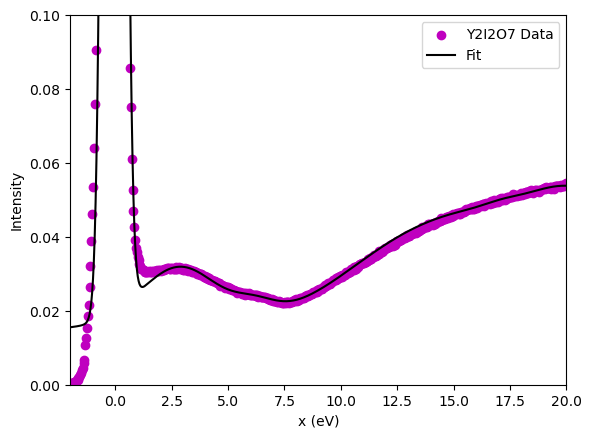

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Parameters, Minimizer, report_fit

# Define Gaussian function
def gaussian(x, area, center, fwhm):
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))
    return (area / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - center) ** 2) / (2 * sigma ** 2))

# Define sigmoid background
def sigmoid(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))+0.015

# Apply 0.2 eV shift to the entire fit
SHIFT_E = 0.2

# Model with 5 Gaussians + Sigmoid background
def initial_gaussian(x, area1, cen1, fwhm1, 
                     area2, cen2, fwhm2, 
                     area3, cen3, fwhm3, 
                     area4, cen4, fwhm4,
                     area5, cen5, fwhm5,
                     area6, cen6, fwhm6,
                     area7, cen7, fwhm7,
                     a, b, c):
    x_shifted = x - SHIFT_E  # Apply the shift to x before passing it into functions
    return (gaussian(x_shifted, area1, cen1, fwhm1) +
            gaussian(x_shifted, area2, cen2, fwhm2) +
            gaussian(x_shifted, area3, cen3, fwhm3) +
            gaussian(x_shifted, area4, cen4, fwhm4) +
            gaussian(x_shifted, area5, cen5, fwhm5) +
            gaussian(x_shifted, area6, cen6, fwhm6) +
            gaussian(x_shifted, area7, cen7, fwhm7) +
            sigmoid(x_shifted, a, b, c))

# Define residuals function for fitting
def residuals(params, x, y):
    model = initial_gaussian(x, 
                             params['area1'], params['cen1'], params['fwhm1'], 
                             params['area2'], params['cen2'], params['fwhm2'], 
                             params['area3'], params['cen3'], params['fwhm3'], 
                             params['area4'], params['cen4'], params['fwhm4'],  
                             params['area5'], params['cen5'], params['fwhm5'],
                             params['area6'], params['cen6'], params['fwhm6'],
                             params['area7'], params['cen7'], params['fwhm7'],
                             params['a'], params['b'], params['c'])
    return model - y

# Peak fitting function
def fit_peak(x1, y1, plot_fit=True, max_nfev=200000):
    params = Parameters()
    
    # Main peak
    params.add('area1', value=0.6, min=0.0001, max=5, vary=True)
    params.add('cen1', value=0.2, min=-1.8, max=2.2, vary=True)  
    params.add('fwhm1', value=0.5, min=0.1, max=2, vary=True)  
    
    # Secondary peaks
    params.add('area2', value=0.009, min=0.0001, max=2, vary=True)
    params.add('cen2', value=2.8, min=2, max=5.2, vary=False)
    params.add('fwhm2', value=3, min=0.1, max=6, vary=False)
    
    params.add('area3', value=0.09, min=0.001, max=10, vary=True)
    params.add('cen3', value=15, min=13, max=17, vary=True)
    params.add('fwhm3', value=2.5, min=0.1, max=10, vary=True)
    
    
    params.add('area4', value=0.05, min=0.00001, max=5, vary=True)
    params.add('cen4', value=20, min=19, max=20.5, vary=True)
    params.add('fwhm4', value=1, min=0.1, max=6, vary=True)

    params.add('area5', value=0.05, min=0.00001, max=1, vary=True)
    params.add('cen5', value=7, min=6, max=8, vary=True)
    params.add('fwhm5', value=2.2, min=.01, max=6, vary=True)
    
    params.add('area6', value=0.09, min=0.0001, max=10, vary=True)
    params.add('cen6', value=2.3, min=2, max=5.2, vary=True)
    params.add('fwhm6', value=2.5, min=0.1, max=7.5, vary=True)
    
    params.add('area7', value=0.09, min=0.0001, max=10, vary=True)
    params.add('cen7', value=2.2, min=1.9, max=2.4, vary=True)
    params.add('fwhm7', value=2.5, min=0.1, max=7.5, vary=True)


    # Sigmoid background
    params.add('a', value=0.035, min=0.01, max=0.5, vary=False)  
    params.add('b', value=0.5, min=0.1, max=10, vary=False)  
    params.add('c', value=10.5, min=4, max=14, vary=False) 
    
    # Perform minimization
    minner = Minimizer(residuals, params, fcn_args=(x1, y1))
    result = minner.minimize(max_nfev=max_nfev)

    # Compute the best fit with the shift applied
    fit_curve = initial_gaussian(x1, 
                                 result.params['area1'], result.params['cen1'], result.params['fwhm1'], 
                                 result.params['area2'], result.params['cen2'], result.params['fwhm2'], 
                                 result.params['area3'], result.params['cen3'], result.params['fwhm3'], 
                                 result.params['area4'], result.params['cen4'], result.params['fwhm4'],  
                                 result.params['area5'], result.params['cen5'], result.params['fwhm5'],  
                                 result.params['area6'], result.params['cen6'], result.params['fwhm6'], 
                                 result.params['area7'], result.params['cen7'], result.params['fwhm7'],
                                 result.params['a'], result.params['b'], result.params['c'])  
    
    report_fit(result.params)
    
    # Plotting
    if plot_fit:
        #plt.figure(figsize=(8, 5))
        plt.scatter(x1, y1, c='m', label="Y2I2O7 Data")
        plt.plot(x1, fit_curve, 'r-', label="Fit", color="black")
        #plt.plot(x1, sigmoid(x1, result.params['a'], result.params['b'], result.params['c']))
        plt.xlim(-2, 20)
        plt.ylim(0, .1)
        plt.xlabel("x (eV)")
        plt.ylabel("Intensity")
        plt.legend()
        plt.savefig("YIO_EELS_Fit.png", dpi=300, bbox_inches='tight')
        plt.show()
    
    return fit_curve

# Load data
file_path = "140_normal_YIO.csv"
df = pd.read_csv(file_path, skiprows=24, sep=r"\s+", names=["Var1", "Var2"])

x = df["Var1"].values
y = df["Var2"].values

# Shift and normalize the data
x_shifted = -((x - 133783) / 1000)
y_normalized = y / 1171220

# Define the cutoff range
mask = x_shifted <= 20
x_cut = x_shifted[mask]
y_cut = y_normalized[mask]

# Run the fitting function
fit_curve = fit_peak(x_cut, y_cut)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Parameters, Minimizer, report_fit

# Define Gaussian function
def gaussian(x, area, center, fwhm):
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))
    return (area / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - center) ** 2) / (2 * sigma ** 2))

# Define sigmoid background
def sigmoid(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))+0.003

# Apply 0.2 eV shift to the entire fit
SHIFT_E = 0.2

# Model with 5 Gaussians + Sigmoid background
def initial_gaussian(x, area1, cen1, fwhm1, 
                     area2, cen2, fwhm2, 
                     area3, cen3, fwhm3, 
                     area4, cen4, fwhm4,
                     area5, cen5, fwhm5,
                     area6, cen6, fwhm6,
                     area7, cen7, fwhm7,
                     a, b, c):
    x_shifted = x - SHIFT_E  # Apply the shift to x before passing it into functions
    return (gaussian(x_shifted, area1, cen1, fwhm1) +
            gaussian(x_shifted, area2, cen2, fwhm2) +
            gaussian(x_shifted, area3, cen3, fwhm3) +
            gaussian(x_shifted, area4, cen4, fwhm4) +
            gaussian(x_shifted, area5, cen5, fwhm5) +
            gaussian(x_shifted, area6, cen6, fwhm6) +
            gaussian(x_shifted, area7, cen7, fwhm7) +
            sigmoid(x_shifted, a, b, c))

# Define residuals function for fitting
def residuals(params, x, y):
    model = initial_gaussian(x, 
                             params['area1'], params['cen1'], params['fwhm1'], 
                             params['area2'], params['cen2'], params['fwhm2'], 
                             params['area3'], params['cen3'], params['fwhm3'], 
                             params['area4'], params['cen4'], params['fwhm4'],  
                             params['area5'], params['cen5'], params['fwhm5'],
                             params['area6'], params['cen6'], params['fwhm6'],
                             params['area7'], params['cen7'], params['fwhm7'],
                             params['a'], params['b'], params['c'])
    return model - y

# Peak fitting function
def fit_peak(x1, y1, plot_fit=True, max_nfev=200000):
    params = Parameters()
    
    # Main peak
    params.add('area1', value=0.5, min=0.0001, max=5, vary=True)
    params.add('cen1', value=0.2, min=-1.8, max=2.2, vary=True)  
    params.add('fwhm1', value=0.5, min=0.1, max=2, vary=True)  
    
    # Secondary peaks
    params.add('area2', value=0.09, min=0.0001, max=10, vary=True)
    params.add('cen2', value=2, min=1.5, max=2.5, vary=True)
    params.add('fwhm2', value=2.5, min=0.1, max=10, vary=True)
    
    params.add('area3', value=0.09, min=0.0001, max=10, vary=True)
    params.add('cen3', value=3, min=2, max=5, vary=True)
    params.add('fwhm3', value=2.5, min=0.1, max=10, vary=True)
    
    
    params.add('area4', value=0.05, min=0.00001, max=5, vary=True)
    params.add('cen4', value=14.2, min=12.2, max=18.2, vary=True)
    params.add('fwhm4', value=1, min=0.1, max=6, vary=True)

    params.add('area5', value=0.05, min=0.00001, max=1, vary=True)
    params.add('cen5', value=9, min=9, max=11, vary=True)
    params.add('fwhm5', value=2.2, min=.01, max=6, vary=True)
    
    #params.add('area6', value=0.09, min=0.0001, max=10, vary=True)
    #params.add('cen6', value=4, min=2, max=5.2, vary=True)
    #params.add('fwhm6', value=2.5, min=0.1, max=7.5, vary=True)
    
    params.add('area7', value=0.09, min=0.0001, max=10, vary=True)
    params.add('cen7', value=15, min=10, max=17, vary=True)
    params.add('fwhm7', value=2.5, min=0.1, max=7.5, vary=True)


    # Sigmoid background
    params.add('a', value=0.008, min=0.01, max=0.5, vary=False)  
    params.add('b', value=0.9, min=0.1, max=10, vary=False)  
    params.add('c', value=8.7, min=4, max=14, vary=False) 
    
    # Perform minimization
    minner = Minimizer(residuals, params, fcn_args=(x1, y1))
    result = minner.minimize(max_nfev=max_nfev)

    # Compute the best fit with the shift applied
    # Compute the best fit with the shift applied
    fit_curve = initial_gaussian(x1, 
                             result.params['area1'], result.params['cen1'], result.params['fwhm1'], 
                             result.params['area2'], result.params['cen2'], result.params['fwhm2'], 
                             result.params['area3'], result.params['cen3'], result.params['fwhm3'], 
                             result.params['area4'], result.params['cen4'], result.params['fwhm4'],  
                             result.params['area5'], result.params['cen5'], result.params['fwhm5'],  
                             result.params['area6'], result.params['cen6'], result.params['fwhm6'],
                             result.params['area7'], result.params['cen7'], result.params['fwhm7'],  # <-- Add missing Gaussian!
                             result.params['a'], result.params['b'], result.params['c'])  

    report_fit(result.params)
    
    # Plotting
    if plot_fit:
        plt.figure(figsize=(8, 5))
        plt.scatter(x1, y1, c='b', label="Data")
        plt.plot(x1, fit_curve, 'r-', label="Fit", color="yellow")
        #plt.plot(x1, sigmoid(x1, result.params['a'], result.params['b'], result.params['c']))
        plt.xlim(-2, 20)
        plt.ylim(0, .1)
        plt.xlabel("x (eV)")
        plt.ylabel("Intensity")
        plt.legend()
        plt.savefig("HIO_EELS_Fit.png", dpi=300, bbox_inches='tight')
        plt.show()
    
    return fit_curve

# Load data
file_path = "HIO_200eV_norm.csv"
df = pd.read_csv(file_path, skiprows=24, sep=r"\s+", names=["Var1", "Var2"])

x = df["Var1"].values
y = df["Var2"].values

# Shift and normalize the data
x_shifted = -((x - 204127) / 1000)
y_normalized = y / 996797

# Define the cutoff range
mask = x_shifted <= 20
x_cut = x_shifted[mask]
y_cut = y_normalized[mask]

# Run the fitting function
fit_curve = fit_peak(x_cut, y_cut)


KeyError: 'area6'

[[Variables]]
    area1:  0.52167033 (init = 0.5)
    cen1:   0.15101783 (init = 0.2)
    fwhm1:  0.76969987 (init = 0.5)
    area2:  1.0000e-04 (init = 0.09)
    cen2:   2.49998880 (init = 2)
    fwhm2:  8.71176832 (init = 2.5)
    area3:  0.09497679 (init = 0.09)
    cen3:   2.11640588 (init = 3)
    fwhm3:  4.88838083 (init = 2.5)
    area4:  0.00948911 (init = 0.05)
    cen4:   14.2229542 (init = 14.2)
    fwhm4:  3.54449254 (init = 1)
    area5:  0.00888532 (init = 0.05)
    cen5:   9.00005036 (init = 9)
    fwhm5:  3.71444399 (init = 2.2)
    area7:  0.03246215 (init = 0.09)
    cen7:   16.9926995 (init = 15)
    fwhm7:  7.49944725 (init = 2.5)
    a:      0.01 (fixed)
    b:      0.9 (fixed)
    c:      8.7 (fixed)


C:\Users\test\AppData\Local\Temp\ipykernel_14416\3792668861.py:109: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, fit_curve, 'r-', label="Fit", color="yellow")


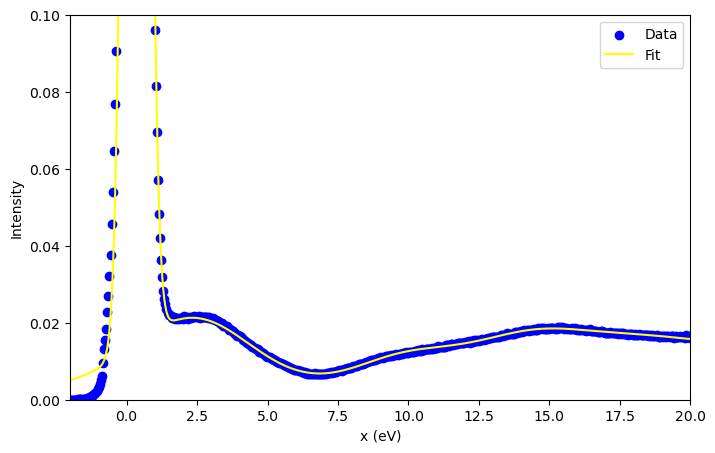

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Parameters, Minimizer, report_fit

# Define Gaussian function
def gaussian(x, area, center, fwhm):
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))
    return (area / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - center) ** 2) / (2 * sigma ** 2))

# Define sigmoid background
def sigmoid(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))+0.003

# Apply 0.2 eV shift to the entire fit
SHIFT_E = 0.2

# Model with 5 Gaussians + Sigmoid background
def initial_gaussian(x, area1, cen1, fwhm1, 
                     area2, cen2, fwhm2, 
                     area3, cen3, fwhm3, 
                     area4, cen4, fwhm4,
                     area5, cen5, fwhm5,
                     area7, cen7, fwhm7,
                     a, b, c):
    x_shifted = x - SHIFT_E  # Apply the shift to x before passing it into functions
    return (gaussian(x_shifted, area1, cen1, fwhm1) +
            gaussian(x_shifted, area2, cen2, fwhm2) +
            gaussian(x_shifted, area3, cen3, fwhm3) +
            gaussian(x_shifted, area4, cen4, fwhm4) +
            gaussian(x_shifted, area5, cen5, fwhm5) +
            gaussian(x_shifted, area7, cen7, fwhm7) +
            sigmoid(x_shifted, a, b, c))

# Define residuals function for fitting
def residuals(params, x, y):
    model = initial_gaussian(x, 
                             params['area1'], params['cen1'], params['fwhm1'], 
                             params['area2'], params['cen2'], params['fwhm2'], 
                             params['area3'], params['cen3'], params['fwhm3'], 
                             params['area4'], params['cen4'], params['fwhm4'],  
                             params['area5'], params['cen5'], params['fwhm5'],
                             params['area7'], params['cen7'], params['fwhm7'],
                             params['a'], params['b'], params['c'])
    return model - y

# Peak fitting function
def fit_peak(x1, y1, plot_fit=True, max_nfev=200000):
    params = Parameters()
    
    # Main peak
    params.add('area1', value=0.5, min=0.0001, max=5, vary=True)
    params.add('cen1', value=0.2, min=-1.8, max=2.2, vary=True)  
    params.add('fwhm1', value=0.5, min=0.1, max=2, vary=True)  
    
    # Secondary peaks
    params.add('area2', value=0.09, min=0.0001, max=10, vary=True)
    params.add('cen2', value=2, min=1.5, max=2.5, vary=True)
    params.add('fwhm2', value=2.5, min=0.1, max=10, vary=True)
    
    params.add('area3', value=0.09, min=0.0001, max=10, vary=True)
    params.add('cen3', value=3, min=2, max=5, vary=True)
    params.add('fwhm3', value=2.5, min=0.1, max=10, vary=True)
    
    
    params.add('area4', value=0.05, min=0.00001, max=5, vary=True)
    params.add('cen4', value=14.2, min=12.2, max=18.2, vary=True)
    params.add('fwhm4', value=1, min=0.1, max=6, vary=True)

    params.add('area5', value=0.05, min=0.00001, max=1, vary=True)
    params.add('cen5', value=9, min=9, max=11, vary=True)
    params.add('fwhm5', value=2.2, min=.01, max=6, vary=True)
    
    #params.add('area6', value=0.09, min=0.0001, max=10, vary=True)
    #params.add('cen6', value=4, min=2, max=5.2, vary=True)
    #params.add('fwhm6', value=2.5, min=0.1, max=7.5, vary=True)
    
    params.add('area7', value=0.09, min=0.0001, max=10, vary=True)
    params.add('cen7', value=15, min=10, max=17, vary=True)
    params.add('fwhm7', value=2.5, min=0.1, max=7.5, vary=True)


    # Sigmoid background
    params.add('a', value=0.008, min=0.01, max=0.5, vary=False)  
    params.add('b', value=0.9, min=0.1, max=10, vary=False)  
    params.add('c', value=8.7, min=4, max=14, vary=False) 
    
    # Perform minimization
    minner = Minimizer(residuals, params, fcn_args=(x1, y1))
    result = minner.minimize(max_nfev=max_nfev)

    # Compute the best fit with the shift applied
    # Compute the best fit with the shift applied
    fit_curve = initial_gaussian(x1, 
                             result.params['area1'], result.params['cen1'], result.params['fwhm1'], 
                             result.params['area2'], result.params['cen2'], result.params['fwhm2'], 
                             result.params['area3'], result.params['cen3'], result.params['fwhm3'], 
                             result.params['area4'], result.params['cen4'], result.params['fwhm4'],  
                             result.params['area5'], result.params['cen5'], result.params['fwhm5'],  
                             result.params['area7'], result.params['cen7'], result.params['fwhm7'],  # <-- Add missing Gaussian!
                             result.params['a'], result.params['b'], result.params['c'])  

    report_fit(result.params)
    
    # Plotting
    if plot_fit:
        plt.figure(figsize=(8, 5))
        plt.scatter(x1, y1, c='b', label="Data")
        plt.plot(x1, fit_curve, 'r-', label="Fit", color="yellow")
        #plt.plot(x1, sigmoid(x1, result.params['a'], result.params['b'], result.params['c']))
        plt.xlim(-2, 20)
        plt.ylim(0, .1)
        plt.xlabel("x (eV)")
        plt.ylabel("Intensity")
        plt.legend()
        plt.savefig("HIO_EELS_Fit.png", dpi=300, bbox_inches='tight')
        plt.show()
    
    return fit_curve

# Load data
file_path = "HIO_200eV_norm.csv"
df = pd.read_csv(file_path, skiprows=24, sep=r"\s+", names=["Var1", "Var2"])

x = df["Var1"].values
y = df["Var2"].values

# Shift and normalize the data
x_shifted = -((x - 204127) / 1000)
y_normalized = y / 996797

# Define the cutoff range
mask = x_shifted <= 20
x_cut = x_shifted[mask]
y_cut = y_normalized[mask]

# Run the fitting function
fit_curve = fit_peak(x_cut, y_cut)


[[Variables]]
    area1:  0.77160894 +/- 0.00551040 (0.71%) (init = 0.6)
    cen1:  -0.24865477 +/- 0.00130544 (0.53%) (init = 0.2)
    fwhm1:  0.74733366 +/- 0.00401847 (0.54%) (init = 0.5)
    area2:  0.06857159 +/- 0.09259632 (135.04%) (init = 0.009)
    cen2:   2.44858179 +/- 1.12874648 (46.10%) (init = 2)
    fwhm2:  4.11039379 +/- 3.54523322 (86.25%) (init = 3)
    area3:  0.00100000 +/- 11.5647269 (1156472.50%) (init = 0.09)
    cen3:   15.8318003 +/- 1048.88346 (6625.17%) (init = 15)
    fwhm3:  7.56409762 +/- 1365.50686 (18052.48%) (init = 2.5)
    area7:  1.0043e-04 +/- 0.03010608 (29975.76%) (init = 0.09)
    cen7:   1.25627446 +/- 3251.47744 (258819.04%) (init = 1.5)
    fwhm7:  9.75296554 +/- 4996.07047 (51226.17%) (init = 2.5)
    area6:  0.01158471 +/- 0.07138919 (616.24%) (init = 0.05)
    cen6:   5.51776631 +/- 3.26951198 (59.25%) (init = 2.8)
    fwhm6:  2.87620114 +/- 6.01572540 (209.16%) (init = 2.2)
    area4:  0.02505692 +/- 0.50512317 (2015.90%) (init = 0.05)
   

C:\Users\test\AppData\Local\Temp\ipykernel_14416\3167188509.py:114: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x1, fit_curve, 'r-', label="Fit", color="black")


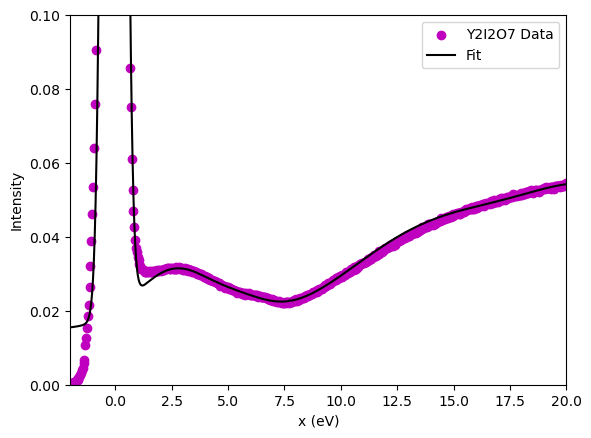

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Parameters, Minimizer, report_fit

# Define Gaussian function
def gaussian(x, area, center, fwhm):
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))
    return (area / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - center) ** 2) / (2 * sigma ** 2))

# Define sigmoid background
def sigmoid(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))+0.015

# Apply 0.2 eV shift to the entire fit
SHIFT_E = 0.2

# Model with 5 Gaussians + Sigmoid background
def initial_gaussian(x, area1, cen1, fwhm1, 
                     area2, cen2, fwhm2, 
                     area3, cen3, fwhm3, 
                     area4, cen4, fwhm4,
                     area5, cen5, fwhm5,
                     area6, cen6, fwhm6,
                     area7, cen7, fwhm7,
                     a, b, c):
    x_shifted = x - SHIFT_E  # Apply the shift to x before passing it into functions
    return (gaussian(x_shifted, area1, cen1, fwhm1) +
            gaussian(x_shifted, area2, cen2, fwhm2) +
            gaussian(x_shifted, area3, cen3, fwhm3) +
            gaussian(x_shifted, area4, cen4, fwhm4) +
            gaussian(x_shifted, area5, cen5, fwhm5) +
            gaussian(x_shifted, area6, cen6, fwhm6) +
            gaussian(x_shifted, area7, cen7, fwhm7) +
            sigmoid(x_shifted, a, b, c))

# Define residuals function for fitting
def residuals(params, x, y):
    model = initial_gaussian(x, 
                             params['area1'], params['cen1'], params['fwhm1'], 
                             params['area2'], params['cen2'], params['fwhm2'], 
                             params['area3'], params['cen3'], params['fwhm3'], 
                             params['area4'], params['cen4'], params['fwhm4'],  
                             params['area5'], params['cen5'], params['fwhm5'],
                             params['area6'], params['cen6'], params['fwhm6'],
                             params['area7'], params['cen7'], params['fwhm7'],
                             params['a'], params['b'], params['c'])
    return model - y

# Peak fitting function
def fit_peak(x1, y1, plot_fit=True, max_nfev=200000):
    params = Parameters()
    
    # Main peak
    params.add('area1', value=0.6, min=0.0001, max=5, vary=True)
    params.add('cen1', value=0.2, min=-1.8, max=2.2, vary=True)  
    params.add('fwhm1', value=0.5, min=0.1, max=2, vary=True)  
    
    # Secondary peaks
    params.add('area2', value=0.009, min=0.0001, max=2, vary=True)
    params.add('cen2', value=2, min=1, max=2.5, vary=True)
    params.add('fwhm2', value=3, min=0.1, max=10, vary=True)
    
    params.add('area3', value=0.09, min=0.001, max=10, vary=True)
    params.add('cen3', value=15, min=13, max=17, vary=True)
    params.add('fwhm3', value=2.5, min=0.1, max=10, vary=True)

    params.add('area7', value=0.09, min=0.0001, max=10, vary=True)
    params.add('cen7', value=1.5, min=1.25, max=1.8, vary=True)
    params.add('fwhm7', value=2.5, min=0.1, max=10, vary=True)
    
    params.add('area6', value=0.05, min=0.00001, max=1, vary=True)
    params.add('cen6', value=2.8, min=2, max=6, vary=True)
    params.add('fwhm6', value=2.2, min=.01, max=10, vary=True)
    
    
    params.add('area4', value=0.05, min=0.00001, max=5, vary=True)
    params.add('cen4', value=20, min=19, max=20.5, vary=True)
    params.add('fwhm4', value=1, min=0.1, max=6, vary=True)

    params.add('area5', value=0.05, min=0.00001, max=1, vary=True)
    params.add('cen5', value=7, min=6, max=8, vary=True)
    params.add('fwhm5', value=2.2, min=.01, max=10, vary=True)
    
    


    # Sigmoid background
    params.add('a', value=0.035, min=0.01, max=0.5, vary=False)  
    params.add('b', value=0.5, min=0.1, max=10, vary=False)  
    params.add('c', value=10.5, min=4, max=14, vary=False) 
    
    # Perform minimization
    minner = Minimizer(residuals, params, fcn_args=(x1, y1))
    result = minner.minimize(max_nfev=max_nfev)

    # Compute the best fit with the shift applied
    fit_curve = initial_gaussian(x1, 
                                 result.params['area1'], result.params['cen1'], result.params['fwhm1'], 
                                 result.params['area2'], result.params['cen2'], result.params['fwhm2'], 
                                 result.params['area3'], result.params['cen3'], result.params['fwhm3'], 
                                 result.params['area4'], result.params['cen4'], result.params['fwhm4'], 
                                 result.params['area6'], result.params['cen6'], result.params['fwhm6'],
                                 result.params['area5'], result.params['cen5'], result.params['fwhm5'],   
                                 result.params['area7'], result.params['cen7'], result.params['fwhm7'],
                                 result.params['a'], result.params['b'], result.params['c'])  
    
    report_fit(result.params)
    
    # Plotting
    if plot_fit:
        #plt.figure(figsize=(8, 5))
        plt.scatter(x1, y1, c='m', label="Y2I2O7 Data")
        plt.plot(x1, fit_curve, 'r-', label="Fit", color="black")
        #plt.plot(x1, sigmoid(x1, result.params['a'], result.params['b'], result.params['c']))
        plt.xlim(-2, 20)
        plt.ylim(0, .1)
        plt.xlabel("x (eV)")
        plt.ylabel("Intensity")
        plt.legend()
        plt.savefig("YIO_EELS_Fit.png", dpi=300, bbox_inches='tight')
        plt.show()
    
    return fit_curve

# Load data
file_path = "140_normal_YIO.csv"
df = pd.read_csv(file_path, skiprows=24, sep=r"\s+", names=["Var1", "Var2"])

x = df["Var1"].values
y = df["Var2"].values

# Shift and normalize the data
x_shifted = -((x - 133783) / 1000)
y_normalized = y / 1171220

# Define the cutoff range
mask = x_shifted <= 20
x_cut = x_shifted[mask]
y_cut = y_normalized[mask]

# Run the fitting function
fit_curve = fit_peak(x_cut, y_cut)
